In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
from glob import glob

In [3]:
def aggregate(maps):
    '''
        aggregate healpix maps
    '''
    hpmap = np.zeros(12*256*256)

    for mapi in maps:
        hmapi = hp.read_map(mapi, verbose=False)
        nonan = ~np.isnan(hmapi)
        hpmap[nonan] += hmapi[nonan]
        print(mapi, np.percentile(hmapi[nonan], [0, 100]))

    hpmap[hpmap==0.] = np.nan    
    return hpmap

In [4]:
hpelg = aggregate(glob('/home/mehdi/data/alternative/results_elg/regression_*/nn_p/nn-weights.hp256.fits'))

/home/mehdi/data/alternative/results_elg/regression_decaln/nn_p/nn-weights.hp256.fits [0.41903098 1.35410036]
/home/mehdi/data/alternative/results_elg/regression_decals/nn_p/nn-weights.hp256.fits [0.6468414 1.8100089]
/home/mehdi/data/alternative/results_elg/regression_bmzls/nn_p/nn-weights.hp256.fits [0.54019145 1.66983764]


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [5]:
hplrg = aggregate(glob('/home/mehdi/data/alternative/results_lrg/regression_*/nn_p/nn-weights.hp256.fits'))

/home/mehdi/data/alternative/results_lrg/regression_decaln/nn_p/nn-weights.hp256.fits [0.61917974 1.37131762]
/home/mehdi/data/alternative/results_lrg/regression_decals/nn_p/nn-weights.hp256.fits [0.47409768 1.35952218]
/home/mehdi/data/alternative/results_lrg/regression_bmzls/nn_p/nn-weights.hp256.fits [0.5559771  1.37189809]


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:11

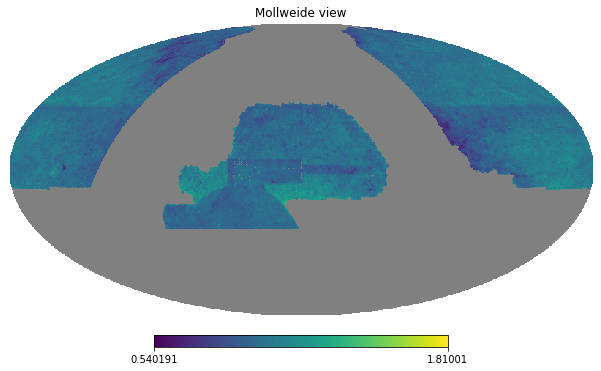

In [6]:
hp.mollview(hpelg)

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:11

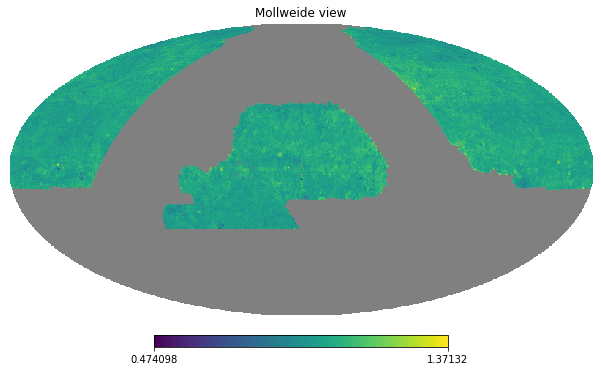

In [17]:
hp.mollview(hplrg)

In [8]:
ng_elg = hp.read_map('/home/mehdi/data/alternative/elg_gal256.fits')
ng_lrg = hp.read_map('/home/mehdi/data/alternative/lrg_gal256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


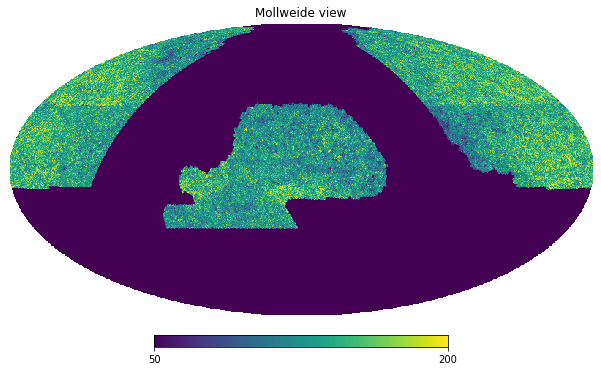

In [12]:
hp.mollview(ng_elg, min=50, max=200)

In [13]:
ng_elg_c = ng_elg / hpelg
ng_lrg_c = ng_lrg / hplrg

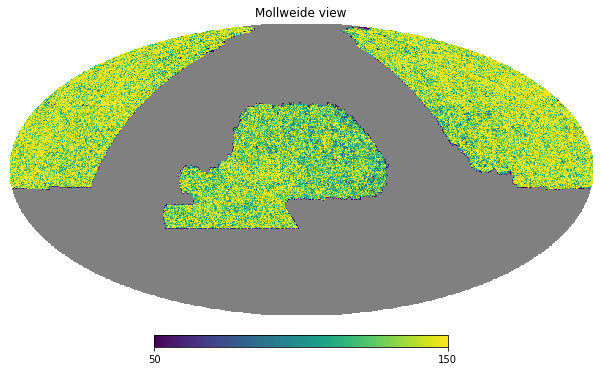

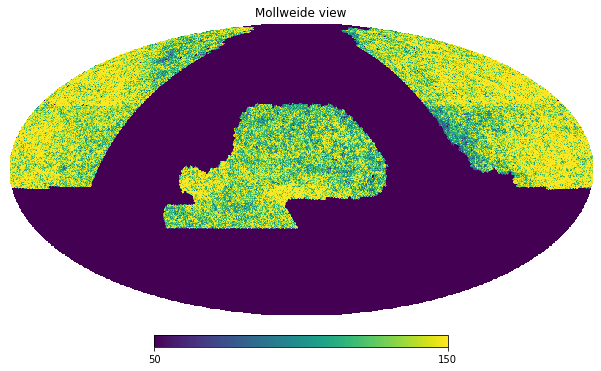

In [16]:
hp.mollview(ng_elg_c, min=50, max=150)
hp.mollview(ng_elg, min=50, max=150)

In [18]:
hp.write_map('/home/mehdi/data/alternative/elg_gal_nnp_256.fits', ng_elg_c)
hp.write_map('/home/mehdi/data/alternative/lrg_gal_nnp_256.fits', ng_lrg_c)